### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Load dataset

In [2]:
df = pd.read_csv('adult.data', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'year_income'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,year_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1. How many males and females are there?

In [3]:
df.groupby('sex')['age'].count()

sex
 Female    10771
 Male      21790
Name: age, dtype: int64

### 2. What is the mean male age?

In [4]:
df[df['sex'].str.strip().str.startswith('M')]['age'].mean()

39.43354749885268

### 3. What is the proportion of the US citizens?

In [5]:
df[df['native-country'].str.strip().str.match('United-States')]['age'].count() / df['native-country'].count()

0.895857006848684

### 4. Plot the distribution of people’s education as a bar plot.

<BarContainer object of 16 artists>

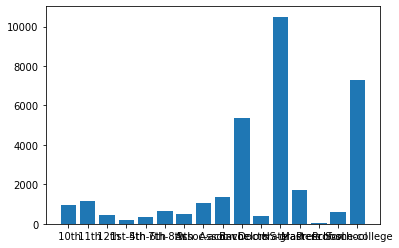

In [6]:
plt.bar(df.groupby('education').groups.keys(), df.groupby('education')['age'].count())

### 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [7]:
df[df['marital-status'].str.strip().str.match('Divorced')]['fnlwgt'].agg(['mean', 'std'])

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

### 6. Is it true that the people who receive over 50k are mostly highly educated? (yes)

In [8]:
df[df['year_income'].str.strip().str.startswith('>')].groupby('education')['age'].count()

education
 10th              62
 11th              60
 12th              33
 1st-4th            6
 5th-6th           16
 7th-8th           40
 9th               27
 Assoc-acdm       265
 Assoc-voc        361
 Bachelors       2221
 Doctorate        306
 HS-grad         1675
 Masters          959
 Prof-school      423
 Some-college    1387
Name: age, dtype: int64

<BarContainer object of 15 artists>

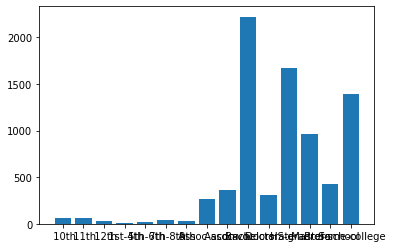

In [9]:
plt.bar(df[df['year_income'].str.strip().str.startswith('>')].groupby('education').groups.keys(), df[df['year_income'].str.strip().str.startswith('>')].groupby('education')['age'].count())

### 7. What is the maximum male and female age for each race?

In [10]:
df.groupby(['race', 'sex'])['age'].max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

### 8. The people from which countries work as farmers/fishers?

In [11]:
df[df['occupation'].str.strip().str.match('Farming-fishing')].groupby('native-country')['age'].count()

native-country
 ?                  5
 Cambodia           1
 Canada             2
 Cuba               2
 El-Salvador        2
 England            1
 France             1
 Germany            1
 Guatemala          4
 Hong               1
 Ireland            1
 Italy              2
 Japan              1
 Mexico            77
 Philippines        4
 Poland             1
 Portugal           1
 Puerto-Rico        5
 United-States    879
 Vietnam            2
 Yugoslavia         1
Name: age, dtype: int64

### 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [12]:
df[df['education'].str.strip().str.match('Bachelor')].groupby(['sex'])['age'].count() / df[df['education'].str.strip().str.startswith('Master')].groupby(['sex'])['age'].count()

sex
 Female    3.020522
 Male      3.147430
Name: age, dtype: float64

### 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [13]:
max_hours = df['hours-per-week'].max()
max_hours

99

In [14]:
df[df['hours-per-week'] == max_hours].groupby('year_income')['age'].count()

year_income
 <=50K    60
 >50K     25
Name: age, dtype: int64